## Improving the secretion score of a protein

In [9]:
import os, sys

In [10]:
import lmpm

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#to remove
import pickle
import os
current_wd = '/home/mexposit/LMPM/lmpm'
from lmpm.unirep import get_UniReps


from lmpm import secretion_score


# in the module, use:
# from .predict import secretion_score

In [12]:
amino_acids = ['G', 'A', 'L', 'M', 'F',
               'W', 'K', 'Q', 'E', 'S',
               'P', 'V', 'I', 'C', 'Y',
               'H', 'R', 'N', 'D', 'T']

In [13]:
seq = 'GALRNDTGALMFWK'
org = 'ecoli'
target = 'membrane'

1. get the predicted class and probability at which the sequence belongs to -> Do I really need to do it if we already did that?
2. define a target class you want to optimize for
3. take in a list of positions to mutate if desired

In [14]:
seq[:3]+str('A')+seq[3+1:]

'GALANDTGALMFWK'

In [15]:
positions = ['1-3','4','7-9']

In [16]:
def get_residue_positions(positions):
    """Converts a list of integers or range of residues to individual residue numbers.
    
    Args:
        positions: list of protein residues as integers or ranges.
            Example: [1,3-5,8]
            
    Returns:
        res_posit: list of individual residues.
            Example: [1,3,4,5,8]
    """
    
    # initialize list
    res_posit = np.array([])
    
    for item in positions:
        # split if contains a "-"
        item = np.array(item.split('-'), dtype='int')
        # if it contains a "-" the length will be 2
        if len(item) == 2:
            # create a range of integers from lower to higher value
            res_posit = np.append(res_posit, list(range(item[0], item[1]+1)))
        elif len(item) == 1:
            res_posit = np.append(res_posit, item)
        else:
            raise ValueError('The position should be a list of integers or ranges defined as: "integer-integer"')
    
    res_posit = np.array(np.unique(np.sort(res_posit)), dtype='int')
    
    return res_posit

In [17]:
# wrapper function
def optimize_sequence(sequence, organism, target_class, include_dg=False, positions=None):
    """
    
    """
    # First, find the initial class and initial secretion score for that class
    initial_class, initial_score = secretion_score(sequence, organism, target_class, include_dg)
    # Also find the probability of being from the target_class
#     print('The initial sequence is:', sequence)
#     print('The initial localization clas is:', initial_class)
#     print('The initial probability of being in the secreted class is:', 
#         initial_score)
    
    
    # if no position was specified mutate all
    if positions == None:
        res_poses = np.array(list(range(0,len(sequence))))
    else:
        # create test to check if position is a list
        res_poses = get_residue_positions(positions)
        # inform user that positions are 1 based so that they can usually work on that from a pdb file
        # convert positions to 0 based positions
        res_poses = res_poses - 1
        
        # check if largest position is within the protein length
        if np.max(res_poses)+1 > len(sequence):
            raise ValueError('You passed residue position '+str(np.max(res_poses)+1)+', which is larger than the protein length of '+str(len(sequence))+' residues.')
        else:
            pass

    mutated_scores = pd.DataFrame()
    
    for resid in res_poses:
#         print("running position", resid, "of", str(np.max(res_poses)))
        
        mut_score_pos = []
        
        for mutation in amino_acids:
            mutated_seq = sequence[:resid] + str(mutation) + sequence[resid+1:]
#             pred_score = 3
            pred_class, pred_score = secretion_score(mutated_seq, organism, target_class, include_dg)
            mut_score_pos.append(pred_score)
        
        mut_score_pos = pd.Series(mut_score_pos, index = amino_acids)
        
        original_name = str(sequence[resid]) + '_' + str(resid)
        
        mutated_scores[original_name] = mut_score_pos

    
    
    return mutated_scores

In [21]:
dats = optimize_sequence(seq, org, target, positions=['1','3'])

In [28]:
initial_class, initial_score = secretion_score(seq, org, target)
#     print('The initial sequence is:', sequence)
print('The initial localization clas is:', initial_class)
print('The initial probability of being in the secreted class is:', 
        initial_score)

The initial localization clas is: cytoplasm
The initial probability of being in the secreted class is: 0.00020046830765140626


In [30]:
dats-initial_score

,G_0,L_2
G,0.000000,-0.000177
A,0.003747,-0.000174
L,0.007354,0.000000
M,-0.000061,-0.000161
F,0.000776,-0.000155
W,0.001325,-0.000192
K,0.002434,-0.000192
Q,0.000752,-0.000192
E,0.000238,-0.000193
S,0.009598,-0.000178


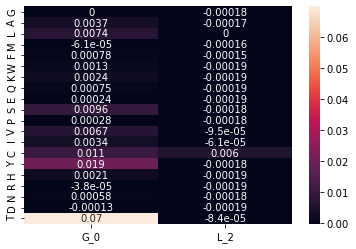

In [31]:
sns.heatmap(dats-initial_score, annot=True)
plt.show()

In [32]:
data2 = dats

In [33]:
for i in range(0,20):
    data2[str(i)+'a'] = dats['G_0']
    data2[str(i)+'b'] = dats['L_2']

In [38]:
data2.values

array([[2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05, 2.00468308e-04, 2.36294600e-05,
        2.00468308e-04, 2.36294600e-05],
       [3.94775243e-03, 2.65336135e-05, 3.94775243e-03, 2.65336135e-05,
        3.94775243e-03, 2.65336135e-05, 3.94775243e-03, 2.65336135e-05,
        3.94775243e-03, 2.65336135e-05, 3.94775243e-03, 2.65336135e-05,
        3.94775243e-03,

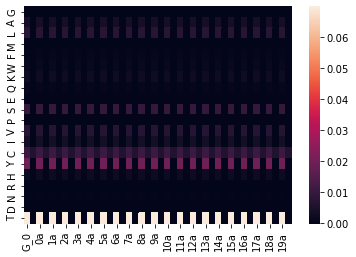

In [35]:
sns.heatmap(data2-initial_score, annot=False)
plt.show()

In [41]:
import matplotlib.colors as colors

<ipython-input-49-76f69fe7b04d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(data2.columns, data2.index, data2.values,


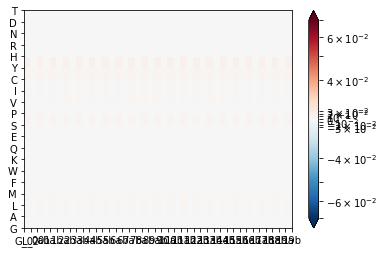

In [49]:
fig, ax = plt.subplots(1, 1)

pcm = ax.pcolormesh(data2.columns, data2.index, data2.values,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-np.max(data2.values), vmax=np.max(data2.values), base=10),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax, extend='both')

plt.show()

<ipython-input-45-de7e5f6b2dc8>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax[0].pcolormesh(data2.columns, data2.index, data2.values,
<ipython-input-45-de7e5f6b2dc8>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax[1].pcolormesh(data2.columns, data2.index, data2.values, cmap='RdBu_r', vmin=-np.max(data2.values))


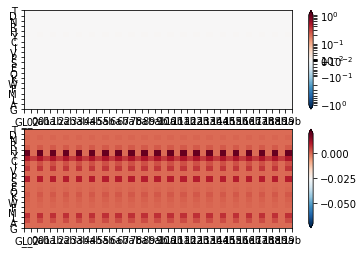

In [45]:
fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(data2.columns, data2.index, data2.values,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0, base=10),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(data2.columns, data2.index, data2.values, cmap='RdBu_r', vmin=-np.max(data2.values))
fig.colorbar(pcm, ax=ax[1], extend='both')
plt.show()

In [ ]:
# loading the model does not cost. Unirep is the slowest part.

In [236]:
def optimize_sequence_2(sequence, organism, target_class, include_dg=False, positions=None):
    """
    
    """
    # First, find the initial class and initial secretion score for that class
    initial_class, initial_score = secretion_score(sequence, organism, target_class, include_dg)
    # Also find the probability of being from the target_class
#     print('The initial sequence is:', sequence)
#     print('The initial localization clas is:', initial_class)
#     print('The initial probability of being in the secreted class is:', 
#         initial_score)
    
    model_human = pickle.load(open(os.path.join(current_wd,"models","human.pkl"), 'rb'))
    model_yeast = pickle.load(open(os.path.join(current_wd,"models","yeast.pkl"), 'rb'))
    model_ecoli = pickle.load(open(os.path.join(current_wd,"models","ecoli.pkl"), 'rb'))
    
    if include_dg:
        model_dict = {
            'human': model_human,
            'yeast': model_yeast,
            'ecoli': model_ecoli
        }
    else: 
        model_dict = {
            'human': model_human,
            'yeast': model_yeast,
            'ecoli': model_ecoli
        }

    # Access the specific organism model
    model = model_dict[organism]
    
    
    # if no position was specified mutate all
    if positions == None:
        res_poses = np.array(list(range(0,len(sequence))))
    else:
        # create test to check if position is a list
        res_poses = get_residue_positions(positions)
        # inform user that positions are 1 based so that they can usually work on that from a pdb file
        # convert positions to 0 based positions
        res_poses = res_poses - 1
        
        # check if largest position is within the protein length
        if np.max(res_poses)+1 > len(sequence):
            raise ValueError('You passed residue position '+str(np.max(res_poses)+1)+', which is larger than the protein length of '+str(len(sequence))+' residues.')
        else:
            pass

    mutated_scores = pd.DataFrame()
    
    classes = list(model.classes_)
    for resid in res_poses:
#         print("running position", resid, "of", str(np.max(res_poses)))
        
        mut_score_pos = []
        
        for mutation in amino_acids:
            mutated_seq = sequence[:resid] + str(mutation) + sequence[resid+1:]
#             pred_score = 3

            values = get_UniReps(sequence)[0] # do we need this [0]?
            if include_dg:
                dg = calculate_transmembrane_dg(sequence)
                values.append(dg)
            values = values.reshape(1, -1)

                
                # Grab the probabilities from the model
            prediction_probabilities = list(model.predict_proba(values)[0])
                # Returns probability of being secreted class
            pred_score = prediction_probabilities[classes.index(target_class)]
    
    
#             pred_class, pred_score = secretion_score(mutated_seq, organism, target_class, include_dg)
            mut_score_pos.append(pred_score)
        
        mut_score_pos = pd.Series(mut_score_pos, index = amino_acids)
        
        original_name = str(sequence[resid]) + '_' + str(resid)
        
        mutated_scores[original_name] = mut_score_pos

    return mutated_scores

In [237]:
%timeit optimize_sequence_2(seq, org, target, positions=['1','3'])

47.2 s ± 12.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [238]:
%timeit optimize_sequence(seq, org, target, positions=['1','3'])

43.4 s ± 2.06 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [240]:
%timeit get_UniReps(sequence)[0]

993 ms ± 85.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# wrapper function
def optimize_sequence(seq, target_class, organism, include_dg=False, position=None):
    """
    
    """
    # First, find the initial class and initial secretion score for that class
    initial_class, initial_score = secretion_score(seq, organism, target_class, include_dg)
    # Also find the probability of being from the target_class
    print('The initial sequence is:', sequence)
    print('The initial localization clas is:', initial_class)
    print('The initial probability of being in the secreted class is:', 
        initial_score)


In [196]:
def secretion_optimization(sequence, organism, position, include_dg=False):
    """
    Introduces amino acid point mutation at given position to improve
    probability of given sequence to be part of the secreted class

    Args:
        sequence (str): amino acid sequence in single-letter format
        organism (str): specific organism of sequence type 
                        (all, human, yeast, ecoli)
        position (int): given position where point mutations can occur
                        (where first residue is position 0)
        include_dg (Boolean): specify inclusion of additional features
                                (default=False)

    Returns:
        sequence (str): mutated amino acid sequence
        point_mutation_dict (dict): dictionary of point mutation amino acid
                                    and secretion score
    """
    # First, find the initial class and initial secretion score
    initial_class, initial_score = secretion_score(sequence, organism, include_dg)
    print('The initial sequence is:', sequence)
    print('The initial localization clas is:', initial_class)
    print('The initial probability of being in the secreted class is:', 
        initial_score)

    # Set up point mutations
    mutated_scores_list = []
    for residue in amino_acids:
        sequence_list = list(sequence)
        sequence_list[position] = residue
        mutated_sequence = "".join(sequence_list)
        mutated_class, mutated_score = secretion_score(
            sequence, organism, include_dg)
        mutated_scores_list.append(mutated_score)
        # Replace initial sequence if mutated secretion score is better
        if mutated_score > initial_score:
            sequence = mutated_sequence
            initial_score = mutated_score
            initial_class = mutated_class

    print('The mutated sequence is:', sequence)
    print('The mutated class is:', initial_class)
    print('The mutated probability of being in the secreted class is:',
        mutated_score)

    # Plot point mutations and scores
    plt.plot(amino_acids, mutated_scores_list)
    plt.xlabel('Amino Acid Point Mutation at Position %d' % position)
    plt.ylabel('Probability of Secretion Class')

    # Create dictionary of point mutations and scores
    point_mutation_dict = {amino_acids[i]: mutated_scores_list[i]
        for i in range(len(amino_acids))}

    return sequence, point_mutation_dict


In [ ]:
def secretion_optimization_all_positions(sequence, organism):
    """
    create ssm like representation
    """


def optimize_secretion(sequence, organism, position):
    """
    Wrapper function.

    It would be great if we added a parameter position that can take in a list of positions
    so the user is free to mutate only one position or a few positions of the sequence. 
    If nothing is passed, we mutate all sequence.

    """

